In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sys.path.insert(0, os.path.join(os.getcwd(), "..", "src", "data"))
from DataLoader import DataLoader
from FileParser import FileParser

## Author IDs vs. Author Names

In [3]:
d_train = DataLoader()
d_train.papers(
    ["2008", "2009", "2010", "2011", "2012", "2013", "2014"]).conferences().conferenceseries()

d_validation = DataLoader()
d_validation.papers(["2015"]).conferences().conferenceseries()

d_test = DataLoader()
d_test.papers(["2016"]).conferences().conferenceseries()

Process 'chapters_books' not in memory yet.
Process 'chapters_title' not in memory yet.
Process 'chapters_language' not in memory yet.
Process 'chapters_year' not in memory yet.
Process 'books_conferences' not in memory yet.
Process 'conferences_acronym' not in memory yet.
Process 'conferences_city' not in memory yet.
Process 'conferences_country' not in memory yet.
Process 'conferences_datestart' not in memory yet.
Process 'conferences_dateend' not in memory yet.
Process 'conferences_name' not in memory yet.
Process 'conferences_year' not in memory yet.
Process 'conferences_conferenceseries' not in memory yet.
Process 'conferenceseries_name' not in memory yet.
Process 'chapters_books' not in memory yet.
Process 'chapters_title' not in memory yet.
Process 'chapters_language' not in memory yet.
Process 'chapters_year' not in memory yet.
Process 'books_conferences' not in memory yet.
Process 'conferences_acronym' not in memory yet.
Process 'conferences_city' not in memory yet.
Process 'c

In [4]:
len(d_train.data), len(d_validation.data), len(d_test.data)

(152412, 13002, 21300)

In [5]:
parser = FileParser()
chapters_authors = pd.DataFrame(
    list(parser.get_data("chapters_authors").items()), columns=["chapter", "author"])
chapters_author_names = pd.DataFrame(
    list(parser.get_data("chapters_authors_name").items()), columns=["chapter", "authors_name"])
len(chapters_authors), len(chapters_author_names)

Process 'chapters_authors' not in memory yet.
Process 'chapters_authors_name' not in memory yet.


(186760, 186760)

In [6]:
df_train = pd.merge(d_train.data, chapters_authors, how="inner", on=["chapter", "chapter"])
df_train = pd.merge(df_train, chapters_author_names, how="inner", on=["chapter", "chapter"])
df_validation = pd.merge(d_validation.data, chapters_authors, how="inner", on=["chapter", "chapter"])
df_validation = pd.merge(df_validation, chapters_author_names, how="inner", on=["chapter", "chapter"])
df_test = pd.merge(d_test.data, chapters_authors, how="inner", on=["chapter", "chapter"])
df_test = pd.merge(df_test, chapters_author_names, how="inner", on=["chapter", "chapter"])

len(df_train), len(df_validation), len(df_test)

(152409, 13002, 21300)

In [7]:
df_train["len_authors"] = df_train.author.apply(lambda x: len(x))
df_train["len_author_names"] = df_train.authors_name.apply(lambda x: len(x))
df_validation["len_authors"] = df_validation.author.apply(lambda x: len(x))
df_validation["len_author_names"] = df_validation.authors_name.apply(lambda x: len(x))
df_test["len_authors"] = df_test.author.apply(lambda x: len(x))
df_test["len_author_names"] = df_test.authors_name.apply(lambda x: len(x))

### Statistics training data

In [8]:
print("Median number of authors per chapter: {}.".format(df_train["len_authors"].median()))
print("Mean number of authors per chapter: {}.".format(df_train["len_authors"].mean()))
print("Minimum number of authors per chapter: {}.".format(df_train["len_authors"].min()))
print("Maximum number of authors per chapter: {}.".format(df_train["len_authors"].max()))

Median number of authors per chapter: 3.0.
Mean number of authors per chapter: 2.828559993176256.
Minimum number of authors per chapter: 0.
Maximum number of authors per chapter: 45.


In [9]:
print("Number of chapters with no disambiguated authors (no unique ID): {}.".format(len(df_train[df_train.len_authors==0])))

Number of chapters with no disambiguated authors (no unique ID): 6465.


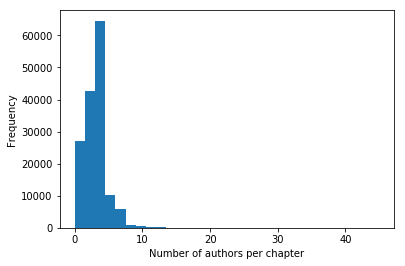

In [10]:
df_train[["len_authors"]].plot(kind="hist",bins=30)
plt.legend().remove()
plt.xlabel("Number of authors per chapter")
plt.show()

In [11]:
df_train[df_train.len_authors==45]

,chapter,book,chapter_title,chapter_language,chapter_year,conference,conference_acronym,conference_city,conference_country,conference_dateend,conference_datestart,conference_name,conference_year,conferenceseries,conferenceseries_name,author,authors_name,len_authors,len_author_names
28970,sg:pub.10.1007/978-3-642-28108-2_19,sg:pub.10.1007/978-3-642-28108-2,Process Mining Manifesto,en,2012,<http://scigraph.springernature.com/things/con...,BPM,Clermont-Ferrand,France,2011-09-02,2011-08-29,International Conference on Business Process M...,2011,<http://scigraph.springernature.com/things/con...,International Conference on Business Process M...,"[sg:person.014757056433.19, sg:person.01650352...","[van der Aalst Wil, Adriansyah Arya, de Medeir...",45,77


In [12]:
df_train[df_train.len_authors==45][["len_authors", "len_author_names"]]

,len_authors,len_author_names
28970,45,77


In [13]:
print("Median number of author names per chapter: {}.".format(df_train["len_author_names"].median()))
print("Mean number of author names per chapter: {}.".format(df_train["len_author_names"].mean()))
print("Minimum number of author names per chapter: {}.".format(df_train["len_author_names"].min()))
print("Maximum number of author names per chapter: {}.".format(df_train["len_author_names"].max()))

Median number of author names per chapter: 3.0.
Mean number of author names per chapter: 3.1446108825594288.
Minimum number of author names per chapter: 1.
Maximum number of author names per chapter: 77.


In [14]:
print("Number of chapters with no disambiguated authors (no unique ID): {}.".format(
    len(df_train[df_train.len_author_names==0])))

Number of chapters with no disambiguated authors (no unique ID): 0.


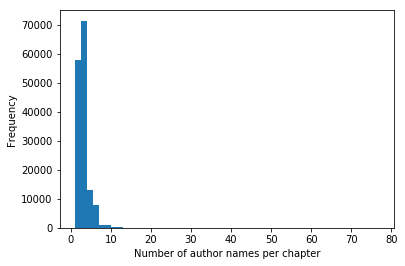

In [15]:
df_train[["len_author_names"]].plot(kind="hist",bins=50)
plt.legend().remove()
plt.xlabel("Number of author names per chapter")
plt.show()

In [16]:
df_train[df_train["len_author_names"]==77]

,chapter,book,chapter_title,chapter_language,chapter_year,conference,conference_acronym,conference_city,conference_country,conference_dateend,conference_datestart,conference_name,conference_year,conferenceseries,conferenceseries_name,author,authors_name,len_authors,len_author_names
28970,sg:pub.10.1007/978-3-642-28108-2_19,sg:pub.10.1007/978-3-642-28108-2,Process Mining Manifesto,en,2012,<http://scigraph.springernature.com/things/con...,BPM,Clermont-Ferrand,France,2011-09-02,2011-08-29,International Conference on Business Process M...,2011,<http://scigraph.springernature.com/things/con...,International Conference on Business Process M...,"[sg:person.014757056433.19, sg:person.01650352...","[van der Aalst Wil, Adriansyah Arya, de Medeir...",45,77


### Statistics validation data

In [17]:
print("Median number of authors per chapter: {}.".format(df_validation["len_authors"].median()))
print("Mean number of authors per chapter: {}.".format(df_validation["len_authors"].mean()))
print("Minimum number of authors per chapter: {}.".format(df_validation["len_authors"].min()))
print("Maximum number of authors per chapter: {}.".format(df_validation["len_authors"].max()))

Median number of authors per chapter: 3.0.
Mean number of authors per chapter: 2.9748500230733734.
Minimum number of authors per chapter: 0.
Maximum number of authors per chapter: 36.


In [18]:
print("Number of chapters with no disambiguated authors (no unique ID): {}.".format(
    len(df_validation[df_validation.len_authors==0])))

Number of chapters with no disambiguated authors (no unique ID): 504.


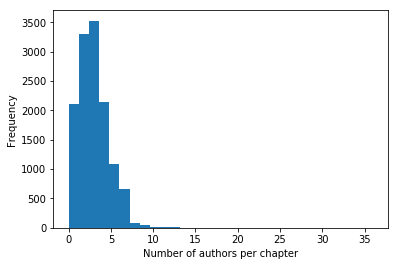

In [19]:
df_validation[["len_authors"]].plot(kind="hist",bins=30)
plt.legend().remove()
plt.xlabel("Number of authors per chapter")
plt.show()

In [20]:
df_validation[df_validation.len_authors==36]

,chapter,book,chapter_title,chapter_language,chapter_year,conference,conference_acronym,conference_city,conference_country,conference_dateend,conference_datestart,conference_name,conference_year,conferenceseries,conferenceseries_name,author,authors_name,len_authors,len_author_names
9836,sg:pub.10.1007/978-3-319-16181-5_14,sg:pub.10.1007/978-3-319-16181-5,The Visual Object Tracking VOT2014 Challenge R...,en,2015,<http://scigraph.springernature.com/things/con...,ECCV,Zurich,Switzerland,2014-09-12,2014-09-06,European Conference on Computer Vision,2014,<http://scigraph.springernature.com/things/con...,European Conference on Computer Vision,"[sg:person.01103043251.16, sg:person.012333263...","[Kristan Matej, Pflugfelder Roman, Leonardis A...",36,57


In [21]:
df_validation[df_validation.len_authors==36][["len_authors", "len_author_names"]]

,len_authors,len_author_names
9836,36,57


In [22]:
print("Median number of author names per chapter: {}.".format(df_validation["len_author_names"].median()))
print("Mean number of author names per chapter: {}.".format(df_validation["len_author_names"].mean()))
print("Minimum number of author names per chapter: {}.".format(df_validation["len_author_names"].min()))
print("Maximum number of author names per chapter: {}.".format(df_validation["len_author_names"].max()))

Median number of author names per chapter: 3.0.
Mean number of author names per chapter: 3.3274880787571144.
Minimum number of author names per chapter: 1.
Maximum number of author names per chapter: 57.


In [23]:
print("Number of chapters with no disambiguated authors (no unique ID): {}.".format(
    len(df_validation[df_validation.len_author_names==0])))

Number of chapters with no disambiguated authors (no unique ID): 0.


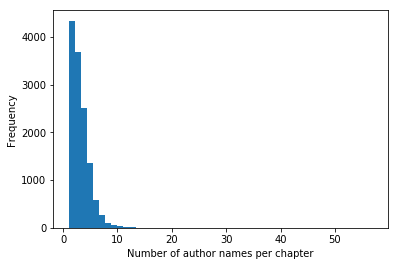

In [24]:
df_validation[["len_author_names"]].plot(kind="hist",bins=50)
plt.legend().remove()
plt.xlabel("Number of author names per chapter")
plt.show()

In [25]:
df_validation[df_validation.len_author_names==57]

,chapter,book,chapter_title,chapter_language,chapter_year,conference,conference_acronym,conference_city,conference_country,conference_dateend,conference_datestart,conference_name,conference_year,conferenceseries,conferenceseries_name,author,authors_name,len_authors,len_author_names
9836,sg:pub.10.1007/978-3-319-16181-5_14,sg:pub.10.1007/978-3-319-16181-5,The Visual Object Tracking VOT2014 Challenge R...,en,2015,<http://scigraph.springernature.com/things/con...,ECCV,Zurich,Switzerland,2014-09-12,2014-09-06,European Conference on Computer Vision,2014,<http://scigraph.springernature.com/things/con...,European Conference on Computer Vision,"[sg:person.01103043251.16, sg:person.012333263...","[Kristan Matej, Pflugfelder Roman, Leonardis A...",36,57


### Statistics test data

In [26]:
print("Median number of authors per chapter: {}.".format(df_test["len_authors"].median()))
print("Mean number of authors per chapter: {}.".format(df_test["len_authors"].mean()))
print("Minimum number of authors per chapter: {}.".format(df_test["len_authors"].min()))
print("Maximum number of authors per chapter: {}.".format(df_test["len_authors"].max()))

Median number of authors per chapter: 3.0.
Mean number of authors per chapter: 2.9847417840375585.
Minimum number of authors per chapter: 0.
Maximum number of authors per chapter: 93.


In [27]:
print("Number of chapters with no disambiguated authors (no unique ID): {}.".format(
    len(df_test[df_test.len_authors==0])))

Number of chapters with no disambiguated authors (no unique ID): 1148.


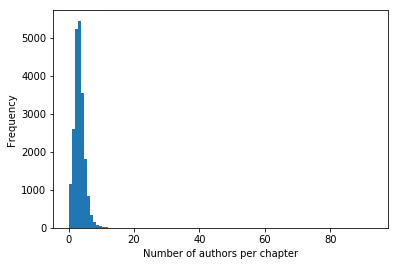

In [28]:
df_test[["len_authors"]].plot(kind="hist",bins=100)
plt.legend().remove()
plt.xlabel("Number of authors per chapter")
plt.show()

In [29]:
df_test[df_test.len_authors==93]

,chapter,book,chapter_title,chapter_language,chapter_year,conference,conference_acronym,conference_city,conference_country,conference_dateend,conference_datestart,conference_name,conference_year,conferenceseries,conferenceseries_name,author,authors_name,len_authors,len_author_names
9147,sg:pub.10.1007/978-3-319-48881-3_54,sg:pub.10.1007/978-3-319-48881-3,The Visual Object Tracking VOT2016 Challenge R...,en,2016,<http://scigraph.springernature.com/things/con...,ECCV,Amsterdam,The Netherlands,2016-10-16,2016-10-08,European Conference on Computer Vision,2016,<http://scigraph.springernature.com/things/con...,European Conference on Computer Vision,"[sg:person.01103043251.16, sg:person.012526151...","[Kristan Matej, Leonardis Aleš, Matas Jiři, Fe...",93,139


In [30]:
df_test[df_test.len_authors==93][["len_authors", "len_author_names"]]

,len_authors,len_author_names
9147,93,139


In [31]:
print("Median number of author names per chapter: {}.".format(df_test["len_author_names"].median()))
print("Mean number of author names per chapter: {}.".format(df_test["len_author_names"].mean()))
print("Minimum number of author names per chapter: {}.".format(df_test["len_author_names"].min()))
print("Maximum number of author names per chapter: {}.".format(df_test["len_author_names"].max()))

Median number of author names per chapter: 3.0.
Mean number of author names per chapter: 3.444882629107981.
Minimum number of author names per chapter: 1.
Maximum number of author names per chapter: 139.


In [32]:
print("Number of chapters with no disambiguated authors (no unique ID): {}.".format(
    len(df_test[df_test.len_author_names==0])))

Number of chapters with no disambiguated authors (no unique ID): 0.


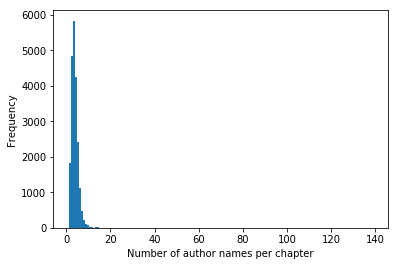

In [33]:
df_test[["len_author_names"]].plot(kind="hist",bins=150)
plt.legend().remove()
plt.xlabel("Number of author names per chapter")
plt.show()

In [34]:
df_test[df_test.len_author_names==139]

,chapter,book,chapter_title,chapter_language,chapter_year,conference,conference_acronym,conference_city,conference_country,conference_dateend,conference_datestart,conference_name,conference_year,conferenceseries,conferenceseries_name,author,authors_name,len_authors,len_author_names
9147,sg:pub.10.1007/978-3-319-48881-3_54,sg:pub.10.1007/978-3-319-48881-3,The Visual Object Tracking VOT2016 Challenge R...,en,2016,<http://scigraph.springernature.com/things/con...,ECCV,Amsterdam,The Netherlands,2016-10-16,2016-10-08,European Conference on Computer Vision,2016,<http://scigraph.springernature.com/things/con...,European Conference on Computer Vision,"[sg:person.01103043251.16, sg:person.012526151...","[Kristan Matej, Leonardis Aleš, Matas Jiři, Fe...",93,139


## Author IDs

In [35]:
d_train = DataLoader()
d_train.papers(
    ["2008", "2009", "2010", "2011", "2012", "2013", "2014"]).conferences().conferenceseries()

d_validation = DataLoader()
d_validation.papers(["2015"]).conferences().conferenceseries()


d_test = DataLoader()
d_test.papers(["2016"]).conferences().conferenceseries()

Process 'chapters_books' not in memory yet.
Process 'chapters_title' not in memory yet.
Process 'chapters_language' not in memory yet.
Process 'chapters_year' not in memory yet.
Process 'books_conferences' not in memory yet.
Process 'conferences_acronym' not in memory yet.
Process 'conferences_city' not in memory yet.
Process 'conferences_country' not in memory yet.
Process 'conferences_datestart' not in memory yet.
Process 'conferences_dateend' not in memory yet.
Process 'conferences_name' not in memory yet.
Process 'conferences_year' not in memory yet.
Process 'conferences_conferenceseries' not in memory yet.
Process 'conferenceseries_name' not in memory yet.
Process 'chapters_books' not in memory yet.
Process 'chapters_title' not in memory yet.
Process 'chapters_language' not in memory yet.
Process 'chapters_year' not in memory yet.
Process 'books_conferences' not in memory yet.
Process 'conferences_acronym' not in memory yet.
Process 'conferences_city' not in memory yet.
Process 'c

In [36]:
authors_train = d_train.author_ids()
authors_validation = d_validation.author_ids()
authors_test = d_test.author_ids()

Process 'author_id_chapters' not in memory yet.
Process 'author_id_chapters' not in memory yet.
Process 'author_id_chapters' not in memory yet.


In [37]:
len(authors_train.data.chapter.unique()), len(authors_validation.data.chapter.unique()), len(authors_test.data.chapter.unique())

(152412, 13002, 21300)

In [38]:
unique_authors_train = authors_train.data.author.unique()
unique_authors_validation = authors_validation.data.author.unique()
Unique_authors_test = authors_test.data.author.unique()

intersect_train_validation = set(unique_authors_train).intersection(set(unique_authors_validation))
intersect_train_test = set(unique_authors_train).intersection(set(Unique_authors_test))
intersect_validation_test = set(unique_authors_validation).intersection(set(Unique_authors_test))

count_train = len(unique_authors_train)
count_validation = len(unique_authors_validation)
count_test = len(Unique_authors_test)

count_intersect_train_validation = len(intersect_train_validation)
count_intersect_train_test = len(intersect_train_test)
count_intersect_validation_test = len(intersect_validation_test)

print("Author IDs in training set: {}".format(count_train))
print("Author IDs in validation set: {}".format(count_validation))
print("Author IDs in test set: {}".format(count_test))

print("Author IDs in intersection train-validation: {}, Proportion: {}".format(
count_intersect_train_validation, round(count_intersect_train_validation/count_validation, 2)))
print("Author IDs in intersection train-test: {}, Proportion: {}".format(
count_intersect_train_test, round(count_intersect_train_test/count_test, 2)))
print("Author IDs in intersection validation-test: {}, Proportion: {}".format(
count_intersect_validation_test, round(count_intersect_validation_test/count_test, 2)))

Author IDs in training set: 178852
Author IDs in validation set: 29625
Author IDs in test set: 45489
Author IDs in intersection train-validation: 17113, Proportion: 0.58
Author IDs in intersection train-test: 21477, Proportion: 0.47
Author IDs in intersection validation-test: 8803, Proportion: 0.19


## Author Names

In [39]:
d_train = DataLoader()
d_train.papers(
    ["2008", "2009", "2010", "2011", "2012", "2013", "2014"]).conferences().conferenceseries()

d_validation = DataLoader()
d_validation.papers(["2015"]).conferences().conferenceseries()


d_test = DataLoader()
d_test.papers(["2016"]).conferences().conferenceseries()

Process 'chapters_books' not in memory yet.
Process 'chapters_title' not in memory yet.
Process 'chapters_language' not in memory yet.
Process 'chapters_year' not in memory yet.
Process 'books_conferences' not in memory yet.
Process 'conferences_acronym' not in memory yet.
Process 'conferences_city' not in memory yet.
Process 'conferences_country' not in memory yet.
Process 'conferences_datestart' not in memory yet.
Process 'conferences_dateend' not in memory yet.
Process 'conferences_name' not in memory yet.
Process 'conferences_year' not in memory yet.
Process 'conferences_conferenceseries' not in memory yet.
Process 'conferenceseries_name' not in memory yet.
Process 'chapters_books' not in memory yet.
Process 'chapters_title' not in memory yet.
Process 'chapters_language' not in memory yet.
Process 'chapters_year' not in memory yet.
Process 'books_conferences' not in memory yet.
Process 'conferences_acronym' not in memory yet.
Process 'conferences_city' not in memory yet.
Process 'c

In [40]:
authors_train = d_train.author_names()
authors_validation = d_validation.author_names()
authors_test = d_test.author_names()

Process 'author_name_chapters' not in memory yet.
Process 'author_name_chapters' not in memory yet.
Process 'author_name_chapters' not in memory yet.


In [41]:
len(authors_train.data.chapter.unique()), len(authors_validation.data.chapter.unique()), len(authors_test.data.chapter.unique())

(152412, 13002, 21300)

In [42]:
unique_authors_train = authors_train.data.author_name.unique()
unique_authors_validation = authors_validation.data.author_name.unique()
Unique_authors_test = authors_test.data.author_name.unique()

intersect_train_validation = set(unique_authors_train).intersection(set(unique_authors_validation))
intersect_train_test = set(unique_authors_train).intersection(set(Unique_authors_test))
intersect_validation_test = set(unique_authors_validation).intersection(set(Unique_authors_test))

count_train = len(unique_authors_train)
count_validation = len(unique_authors_validation)
count_test = len(Unique_authors_test)

count_intersect_train_validation = len(intersect_train_validation)
count_intersect_train_test = len(intersect_train_test)
count_intersect_validation_test = len(intersect_validation_test)

print("Author IDs in training set: {}".format(count_train))
print("Author IDs in validation set: {}".format(count_validation))
print("Author IDs in test set: {}".format(count_test))

print("Author IDs in intersection train-validation: {}, Proportion: {}".format(
count_intersect_train_validation, round(count_intersect_train_validation/count_validation, 2)))
print("Author IDs in intersection train-test: {}, Proportion: {}".format(
count_intersect_train_test, round(count_intersect_train_test/count_test, 2)))
print("Author IDs in intersection validation-test: {}, Proportion: {}".format(
count_intersect_validation_test, round(count_intersect_validation_test/count_test, 2)))

Author IDs in training set: 215281
Author IDs in validation set: 33788
Author IDs in test set: 53625
Author IDs in intersection train-validation: 18162, Proportion: 0.54
Author IDs in intersection train-test: 23935, Proportion: 0.45
Author IDs in intersection validation-test: 9285, Proportion: 0.17
